Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


261/261 ━━━━━━━━━━━━━━━━━━━━ 372s 1s/step - accuracy: 0.9963 - loss: 0.0576 - val_accuracy: 1.0000 - val_loss: 5.2525e-08
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 1.0000 - loss: 2.0243e-05 - val_accuracy: 1.0000 - val_loss: 8.0277e-09
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 1.0000 - loss: 1.1231e-05 - val_accuracy: 1.0000 - val_loss: 2.0642e-09
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 1.0000 - loss: 4.4446e-06 - val_accuracy: 1.0000 - val_loss: 7.6388e-10
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - accuracy: 1.0000 - loss: 9.1336e-06 - val_accuracy: 1.0000 - val_loss: 3.7002e-10


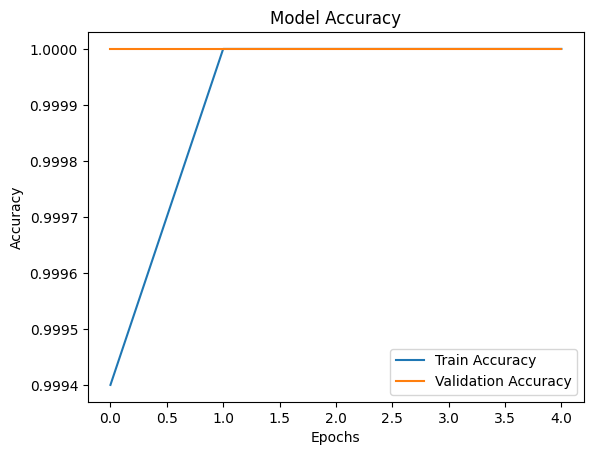

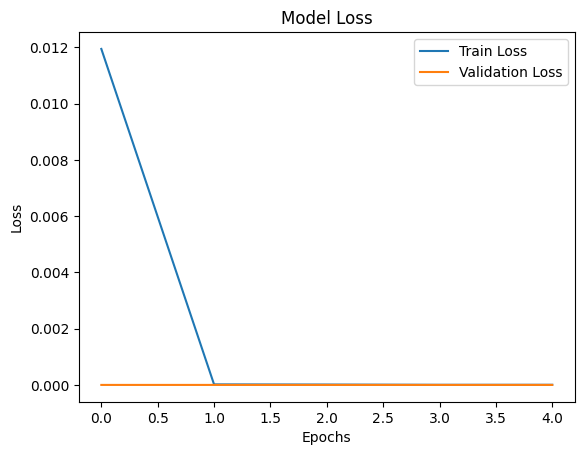

163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 269ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


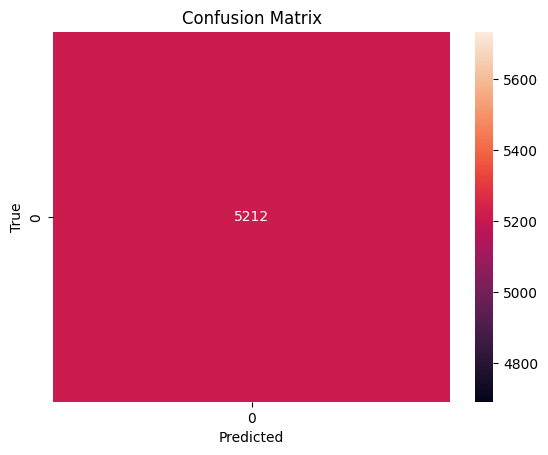

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5212

    accuracy                           1.00      5212
   macro avg       1.00      1.00      1.00      5212
weighted avg       1.00      1.00      1.00      5212



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Bidirectional

# Step 1: Load the Dataset
df = pd.read_csv('/content/final_dataset.csv')  # Update path with the correct file path

# Step 2: Data Preprocessing
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})  # Assuming 'FAKE' and 'REAL' labels
X = df['final_news'].astype(str) # X should be assigned the text data
y = df['label'] # y should be assigned the labels

# ... rest of your code ...

# Tokenizing and padding
max_words = 10000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(sequences, maxlen=max_len)

# Label encoding
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Step 3: Model Architecture - CNN + RNN
embedding_dim = 100

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Training the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 5: Evaluation - Accuracy and Loss Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Test the Model
y_pred = model.predict(X_test)
y_pred_class = np.where(y_pred > 0.5, 1, 0)

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred_class)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred_class))

# Step 7: Real-time News Prediction
def predict_news(news_text):
    news_seq = tokenizer.texts_to_sequences([news_text])
    news_pad = pad_sequences(news_seq, maxlen=max_len)
    prediction = model.predict(news_pad)[0][0]
    if prediction > 0.5:
        print("The news is REAL")
    else:
        print("The news is FAKE")

# Example: User Input Prediction
news_article = input("Enter a news article: ")
predict_news(news_article)
